In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# one hot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

from pygam import LinearGAM, s, f, te

# ignore warning
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# MD with the stock proce D-15 for regression

without groups

In [3]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,23):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,23):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

regression_D = 'D-20'

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', regression_D]
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)
df_MD.head()

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, regression_D)
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_MD_same.iloc[:,0:22]
Y = df_MD_same[regression_D]

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    132.6145
Link Function:                     IdentityLink Log Likelihood:                               -184502.4949
Number of Samples:                         1083 AIC:                                           369272.2187
                                                AICc:                                          369310.1493
                                                GCV:                                                0.0032
                                                Scale:                                              0.0025
                                                Pseudo R-Squared:                                   0.3646
Feature Function                  Lam

With Groups

In [8]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,23):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,23):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

regression_D = 'D-15'

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', regression_D]
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, regression_D)
df_MD_same['Group'] = labelencoder.fit_transform(df_MD_same['Group'])
df_MD_same = df_MD_same.drop(['company_name'], axis=1)

X = df_MD_same.iloc[:,0:23].values.tolist()
Y = df_MD_same[regression_D]

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)+f(22)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    140.9138
Link Function:                     IdentityLink Log Likelihood:                                -221879.554
Number of Samples:                         1036 AIC:                                           444042.9357
                                                AICc:                                          444088.3545
                                                GCV:                                                0.0026
                                                Scale:                                               0.002
                                                Pseudo R-Squared:                                   0.3449
Feature Function                  Lam

In [12]:
df_MD_interp = pd.read_csv('./regression_df_input/MD_model_df.csv')
def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

# apply the same_direction function to the dataframe
df_MD_interp_same = same_direction(df_MD, 'D-15')
# sort the value by df_MD_interp_same["sentiment_topic_2"]
df_MD_interp_same_tp2 = df_MD_interp_same.sort_values(by=['sentiment_topic_2'], ascending=False)
df_MD_interp_same_tp2.head(20)

,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,sentiment_topic_9,sentiment_topic_10,sentiment_topic_11,sentiment_topic_12,sentiment_topic_13,sentiment_topic_14,sentiment_topic_15,sentiment_topic_16,sentiment_topic_17,sentiment_topic_18,sentiment_topic_19,sentiment_topic_20,sentiment_topic_21,sentiment_topic_22,company_name,Group,ticker,file_name,date,WA_sentiment,D-15
336,-0.231086,5.800509,-0.259872,-0.252229,0.061750,3.007005,-0.202875,-0.184765,-0.248789,-0.126447,-0.180915,0.007478,0.346690,-0.051934,1.727494,-0.183859,-0.234106,-0.397651,-0.149322,-0.279855,-0.314028,-0.117911,Beazley PLC-,London Market,BEZ.L,20211105_Beazley_PLC-_Sales_Results_Call_2021-...,2021-11-05,0.016923,0.084741
1634,-0.173264,5.154211,0.883068,9.298130,0.850765,1.998856,-0.132149,-0.091405,3.297273,1.290888,0.696683,-0.090158,-0.319230,-0.022983,0.010091,-0.154383,-0.129020,-0.252512,0.405506,7.226384,-0.333045,-0.062130,Baloise Holding,Other insurers,BALN.SW,20210826_Baloise_Holding_AG-_Earnings_Call_202...,2021-08-26,0.035101,0.028866
944,-0.111475,5.129052,2.828434,-0.089355,-0.176752,1.727277,-0.056571,0.008359,0.098712,-0.299594,0.068764,-0.008485,-0.226937,-0.056208,-0.109087,-0.122885,-0.016727,-0.097418,3.973222,8.630315,11.158366,-0.002523,Swiss Re,European (Re)Insurers,SREN.SW,20211029_Swiss_Re_AG-_Earnings_Call_2021-10-29...,2021-10-29,0.050541,0.098389
1082,0.436551,4.958033,-0.447562,-0.259399,-0.282626,2.179897,-0.110202,-0.193266,-0.264086,-0.429401,-0.191906,-0.173548,3.726721,0.975088,-0.211518,-0.186543,-0.243675,-0.410867,-0.003804,-0.285476,2.627730,-0.122991,QBE INSURANCE-,Japanese & Pacific,QBE.AX,20140728_QBE_INSURANCE-_Guidance_Call_2014-7-2...,2014-07-28,0.022095,0.017109
919,-0.212164,4.513205,1.152973,-0.226463,0.791680,0.343894,-0.179730,0.274266,-0.193814,-0.404258,-0.141416,-0.141576,2.583448,2.592951,0.372081,-0.174213,-0.199716,-0.350154,0.549154,-0.196704,-0.338469,-0.099657,Swiss Re,European (Re)Insurers,SREN.SW,20171102_Swiss_Re_AG-_Earnings_Call_2017-11-2_...,2017-11-02,0.020323,0.026244
433,-0.212649,4.046333,-0.421685,-0.219858,-0.280770,0.315811,-0.144272,-0.090591,0.343796,-0.428496,2.110508,-0.105739,-0.162421,-0.197112,0.007351,-0.150831,-0.254403,1.164390,-0.117460,-0.270756,-0.403428,0.346767,AMERICAN INTERNA-,US - Specialty/P&C/Reinsurance,AIG,20200609_AMERICAN_INTERNA-_Conf-Presentation_C...,2020-06-09,0.009111,0.326538
270,0.192577,3.941935,-0.362258,-0.056778,5.081500,0.193466,-0.142209,-0.104684,2.272528,-0.372372,-0.077383,-0.101029,4.792454,-0.177627,0.623994,-0.158575,-0.143968,2.031607,1.011385,0.210812,0.495819,-0.070065,ZURICH INSURANCE-,Global Commercial,ZURN.SW,20201112_ZURICH_INSURANCE-_Sales_Results_Call_...,2020-11-12,0.030391,0.113256
1632,-0.177688,3.718857,0.026707,9.469947,-0.232889,0.218707,-0.137560,-0.098548,-0.093653,-0.368421,-0.069450,0.386176,-0.325838,0.327610,0.666763,-0.156638,-0.137061,-0.032092,0.446615,4.261021,3.752003,-0.066398,Baloise Holding,Other insurers,BALN.SW,20200827_Baloise_Holding_AG-_Earnings_Call_202...,2020-08-27,0.028498,0.033476
434,-0.243240,3.718001,0.981833,-0.268779,-0.288466,0.003674,-0.193575,-0.044357,2.156682,-0.384100,0.245268,-0.182654,0.221797,0.297052,-0.035430,-0.190054,1.829024,0.093099,-0.140084,-0.254512,-0.398445,-0.063066,AMERICAN INTERNA-,US - Specialty/P&C/Reinsurance,AIG,20200611_AMERICAN_INTERNA-_Conf-Presentation_C...,2020-06-11,0.011480,0.127318
445,-0.200171,3.657809,13.378149,-0.210132,-0.251951,0.045039,-0.165061,-0.134850,2.956168,-0.391792,-0.116382,0.753796,-0.359422,1.326710,0.632917,2.693844,-0.177922,1.758808,0.280681,-0.246850,-0.231951,-0.088088,AMERICAN INTERNA-,US - Specialty/P&C/Reinsurance,AIG,20210602_AMERICAN_INTERNA-_Conf-Presentation_C...,2021-06-02,0.037940,0.052799


In [11]:
df_MD_interp_same_tp2.tail(10)


,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,sentiment_topic_9,sentiment_topic_10,sentiment_topic_11,sentiment_topic_12,sentiment_topic_13,sentiment_topic_14,sentiment_topic_15,sentiment_topic_16,sentiment_topic_17,sentiment_topic_18,sentiment_topic_19,sentiment_topic_20,sentiment_topic_21,sentiment_topic_22,company_name,Group,ticker,file_name,date,WA_sentiment,D-15
1783,-0.261759,-0.527586,-1.080313,-0.293996,-0.597475,-0.262916,-0.241061,-0.437773,-0.431093,-0.455811,-0.244941,-0.986082,-1.186819,-0.328126,-0.737983,-0.199495,-0.289849,-0.727585,-0.187012,-0.312600,-0.509390,-0.162153,INTACT FINANCIAL-,Other insurers,IFC.TO,20140205_INTACT_FINANCIAL-_Earnings_Call_2014-...,2014-02-05,-0.004298,-0.038184
589,-0.260337,-0.576720,-0.542709,-0.383862,-0.302406,-0.283168,-0.242337,-0.316640,-0.336525,-1.091517,-0.240605,-0.208744,-0.644897,-0.378321,-0.318820,-0.198436,-0.286074,-0.725426,-0.168049,-0.310382,-0.434877,-0.285203,ARCH CAPITAL,US - Specialty/P&C/Reinsurance,ACGL,20200505_ARCH_CAPITAL_GRP-_Earnings_Call_2020-...,2020-05-05,-0.001880,-0.188376
766,-0.264041,-0.602577,-0.564698,-0.307554,-0.306102,-0.635952,-0.281934,-0.252941,-0.716533,-0.494211,-0.641877,-0.224983,-0.823412,-0.358788,-0.414885,-0.200658,-0.338022,-0.915618,-0.202895,-0.315037,-0.439505,-0.552961,HARTFORD FINL,US - Specialty/P&C/Reinsurance,HIG,20200520_HARTFORD_FINL_SV-_Conf-Presentation_C...,2020-05-20,-0.003335,-0.149210
855,-0.259965,-0.638025,-0.505361,-0.291554,-0.302646,-0.247663,-0.238199,-0.231393,-0.349748,-0.453947,-0.257033,-0.301332,-0.623538,-0.313724,-0.335097,-0.198580,-0.301244,-0.470139,-0.175343,-0.310685,-0.462649,-0.145771,SCOR SE-,European (Re)Insurers,SCR.PA,20190207_SCOR_SE-_Sales_Results_Call_2019-2-7_...,2019-02-07,-0.000746,-0.091768
645,-0.277621,-0.828450,-0.652386,-0.386390,-0.329141,-0.323807,-0.242269,-0.269635,-0.871768,-0.518288,-0.275308,-0.209160,-0.667468,-0.400999,-0.435794,-0.200277,-0.852013,-0.616597,-0.185146,-0.336002,-0.443693,-0.328893,RENAISSANCERE- Conf-Presentation,US - Specialty/P&C/Reinsurance,RNR,20150910_RENAISSANCERE-_Conf-Presentation_Call...,2015-09-10,-0.002655,-0.030312
446,-0.339358,-2.391118,-0.706702,-6.215192,-0.372238,-0.404433,-2.453820,-0.286447,-3.315000,-1.096701,-0.312374,-0.373461,-0.998672,-0.372858,-0.367475,-0.215962,-2.134902,-0.555728,-0.439225,-0.535978,-0.474713,-0.844282,AMERICAN INTERNA-,US - Specialty/P&C/Reinsurance,AIG,20210630_AMERICAN_INTERNA-_Conf-Presentation_C...,2021-06-30,-0.015674,-0.087423
824,-0.287284,-7.870571,-0.541376,-0.385058,-0.339821,-0.451389,-0.533846,-0.525455,-0.949716,-0.482345,-0.658261,-0.302967,-0.633658,-0.361102,-0.412882,-0.212507,-0.723166,-0.580850,-0.204059,-0.339851,-0.499747,-10.060419,BERKSHIRE HATH-A,US - Specialty/P&C/Reinsurance,BRK-B,20200401_BERKSHIRE_HATH-A_Conf-Presentation_Ca...,2020-04-01,-0.019054,-0.096023
429,-0.287284,-8.024151,-0.547285,-0.334239,-0.360439,-0.427206,-0.417529,-0.588255,-1.117508,-0.667140,-0.658129,-0.305129,-0.527477,-0.440022,-0.372834,-0.212507,-0.629719,-0.563986,-0.192921,-0.339851,-0.482438,-10.009939,AMERICAN INTERNA-,US - Specialty/P&C/Reinsurance,AIG,20200401_AMERICAN_INTERNA-_Conf-Presentation_C...,2020-04-01,-0.019054,-0.333642
546,-0.335638,-8.463519,-0.537684,-0.378175,-0.325808,-0.458820,-0.532881,-0.525455,-0.941890,-0.482345,-0.739585,-0.240872,-0.642545,-0.371607,-0.415415,-0.212507,-0.494267,-0.563986,-0.204059,-0.426738,-0.466763,-9.701107,TRAVELERS COS,US - Specialty/P&C/Reinsurance,TRV,20200401_TRAVELERS_COS_IN-_Conf-Presentation_C...,2020-04-01,-0.019054,-0.154529
764,-0.296729,-8.567705,-0.537684,-0.394824,-0.325808,-0.468540,-0.491192,-0.587943,-0.811915,-0.482345,-0.522601,-0.285187,-0.587046,-0.361102,-0.373045,-0.212507,-0.696944,-0.587635,-0.205933,-0.339851,-0.499609,-9.819828,HARTFORD FINL,US - Specialty/P&C/Reinsurance,HIG,20200401_HARTFORD_FINL_SV-_Conf-Presentation_C...,2020-04

In [5]:
df_MD = pd.read_csv('./regression_df_input/MD_model_df.csv')
df_MD['date'] = df_MD['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,23):
    df_MD['sentiment_'+'topic_'+str(i)] = df_MD['topic_'+str(i)]*df_MD['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,23):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_MD_standard = df_MD[sentiment_topic_columns]

regression_D = 'D-20'

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_MD_standard)
df_MD_scale = scaler.transform(df_MD_standard)
# append the scaled data to the original dataframe
df_MD_scale = pd.DataFrame(df_MD_scale, columns=sentiment_topic_columns)
df_MD_scale.index = df_MD_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', regression_D]
df_MD = pd.concat([df_MD_scale, df_MD[other_columns]], axis=1)

def same_direction(df_MD, day_type):
    df_MD_same = df_MD[((df_MD['WA_sentiment']<0) & (df_MD[day_type]<0)) | ((df_MD['WA_sentiment']>0) & (df_MD[day_type]>0))]
    return df_MD_same

df_MD_same = same_direction(df_MD, regression_D)
df_MD_same['Group'] = labelencoder.fit_transform(df_MD_same['Group'])
df_MD_same = df_MD_same.drop(['company_name'], axis=1)

X = df_MD_same.iloc[:,0:23].values.tolist()
Y = df_MD_same[regression_D]

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10)+
s(11)+s(12)+s(13)+s(14)+s(15)+s(16)+s(17)+s(18)+s(19)+s(20)+s(21)+f(22)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    141.0364
Link Function:                     IdentityLink Log Likelihood:                               -183964.4398
Number of Samples:                         1083 AIC:                                           368212.9526
                                                AICc:                                          368256.1806
                                                GCV:                                                0.0032
                                                Scale:                                              0.0025
                                                Pseudo R-Squared:                                    0.374
Feature Function                  Lam

<Figure size 432x288 with 0 Axes>

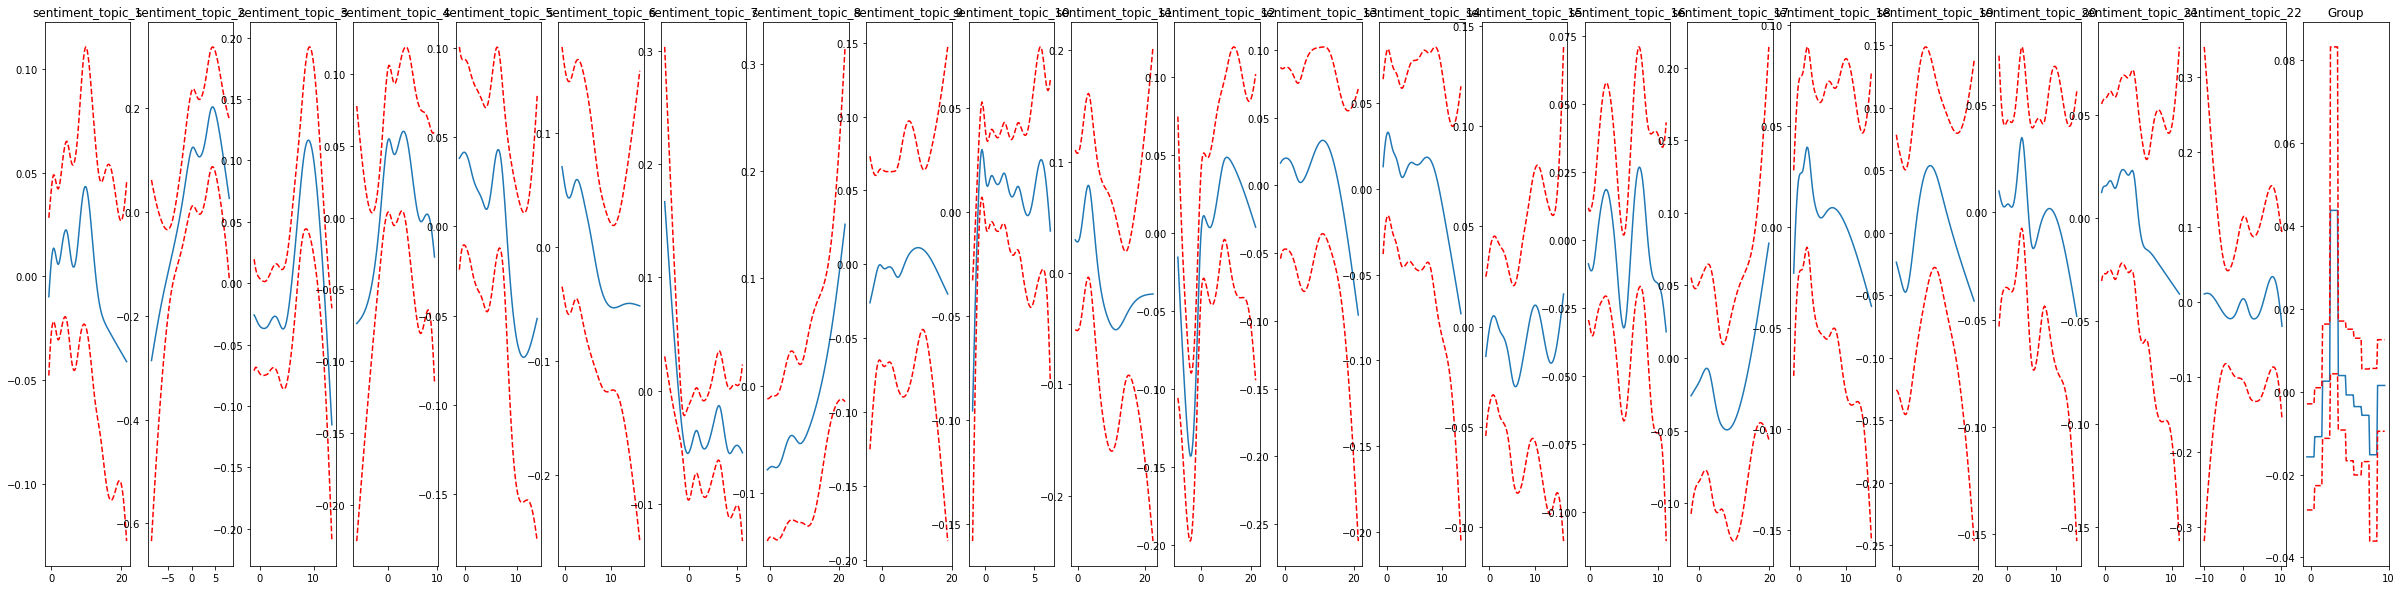

In [6]:
## plotting
plt.figure()
fig, axs = plt.subplots(1,23, figsize=(42,10))

titles = df_MD_same.iloc[:,0:23].columns.to_list()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])

In [32]:
# read the csv
topic_modelling_df_MD22 = pd.read_csv('./main_df_output/topic_modelling_df_MD22.csv')
# topic_modelling_df_MD22 sort by 'topic_2'
topic_modelling_df_MD22_tp2 = topic_modelling_df_MD22.sort_values(by=['topic_2'], ascending=False)
# topic_modelling_df_MD22_tp2 save to csv
topic_modelling_df_MD22_tp2.to_csv('topic_modelling_df_MD22_tp2.csv', index=False)


# QA with the stock proce D-1 for regression

In [104]:
df_QA = pd.read_csv('./regression_df_input/QA_model_df.csv')
df_QA['date'] = df_QA['date'].astype(str)
# ------> multiple the probability with WA_sentiment
for i in range (1,9):
    df_QA['sentiment_'+'topic_'+str(i)] = df_QA['topic_'+str(i)]*df_QA['WA_sentiment']

sentiment_topic_columns = []
for i in range (1,9):
    sentiment_topic_columns.append('sentiment_'+'topic_'+str(i))
df_QA_standard = df_QA[sentiment_topic_columns]

# ------> Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_QA_standard)
df_QA_scale = scaler.transform(df_QA_standard)
# append the scaled data to the original dataframe
df_QA_scale = pd.DataFrame(df_QA_scale, columns=sentiment_topic_columns)
df_QA_scale.index = df_QA_standard.index
# other columns
other_columns = ['company_name','Group','ticker','file_name','date','WA_sentiment', 'D-1']
df_QA = pd.concat([df_QA_scale, df_QA[other_columns]], axis=1)
df_QA.head()

,sentiment_topic_1,sentiment_topic_2,sentiment_topic_3,sentiment_topic_4,sentiment_topic_5,sentiment_topic_6,sentiment_topic_7,sentiment_topic_8,company_name,Group,ticker,file_name,date,WA_sentiment,D-1
0,-0.574383,0.659008,-0.489167,0.609011,0.425316,-0.289616,-0.342206,-0.521563,Admiral Group,Motor/Personal,ADM.L,20110302_Admiral_Group_PLC-_Earnings_Call_2011...,2011-03-02,0.014586,-0.031030
1,-0.188552,0.505780,-0.306110,0.255963,2.523274,-0.379394,-0.017298,-0.346897,Admiral Group,Motor/Personal,ADM.L,20110824_Admiral_Group_PLC-_Earnings_Call_2011...,2011-08-24,0.021825,-0.118567
2,-0.651105,1.019315,-0.511619,-0.171260,-0.457107,-0.115128,-0.355264,-0.284981,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,0.013218,-0.256077
3,-0.437155,1.488000,-0.258071,0.314521,1.454236,-0.053432,-0.251434,0.483739,Admiral Group,Motor/Personal,ADM.L,20111109_Admiral_Group_PLC-_Guidance_Call_2011...,2011-11-09,0.025269,-0.256077
4,-0.389075,3.696063,-0.060091,2.101670,0.284701,-0.025923,0.652275,0.173974,Admiral Group,Motor/Personal,ADM.L,20120307_Admiral_Group_PLC-_Earnings_Call_2012...,2012-03-07,0.037031,0.100000


without groups

In [105]:
df_QA_same = same_direction(df_QA, 'D-1')
# df_MD_same['group'] = labelencoder.fit_transform(df_MD_same['Group'])

X = df_QA_same.iloc[:,0:8]
Y = df_QA_same['D-1']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     59.0686
Link Function:                     IdentityLink Log Likelihood:                               -839964.1351
Number of Samples:                          975 AIC:                                          1680048.4074
                                                AICc:                                         1680056.4349
                                                GCV:                                                0.0006
                                                Scale:                                              0.0005
                                                Pseudo R-Squared:                                   0.2178
Feature Function                  Lam

with groups

In [106]:
df_QA_same = same_direction(df_QA, 'D-1')
df_QA_same['Group'] = labelencoder.fit_transform(df_QA_same['Group'])
df_QA_same = df_QA_same.drop(['company_name'], axis=1)

X = df_QA_same.iloc[:,0:9]
Y = df_QA_same['D-1']

gam = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+f(8)).fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     67.7337
Link Function:                     IdentityLink Log Likelihood:                                -876950.843
Number of Samples:                          975 AIC:                                          1754039.1534
                                                AICc:                                         1754049.7427
                                                GCV:                                                0.0006
                                                Scale:                                              0.0005
                                                Pseudo R-Squared:                                   0.2647
Feature Function                  Lam

<Figure size 432x288 with 0 Axes>

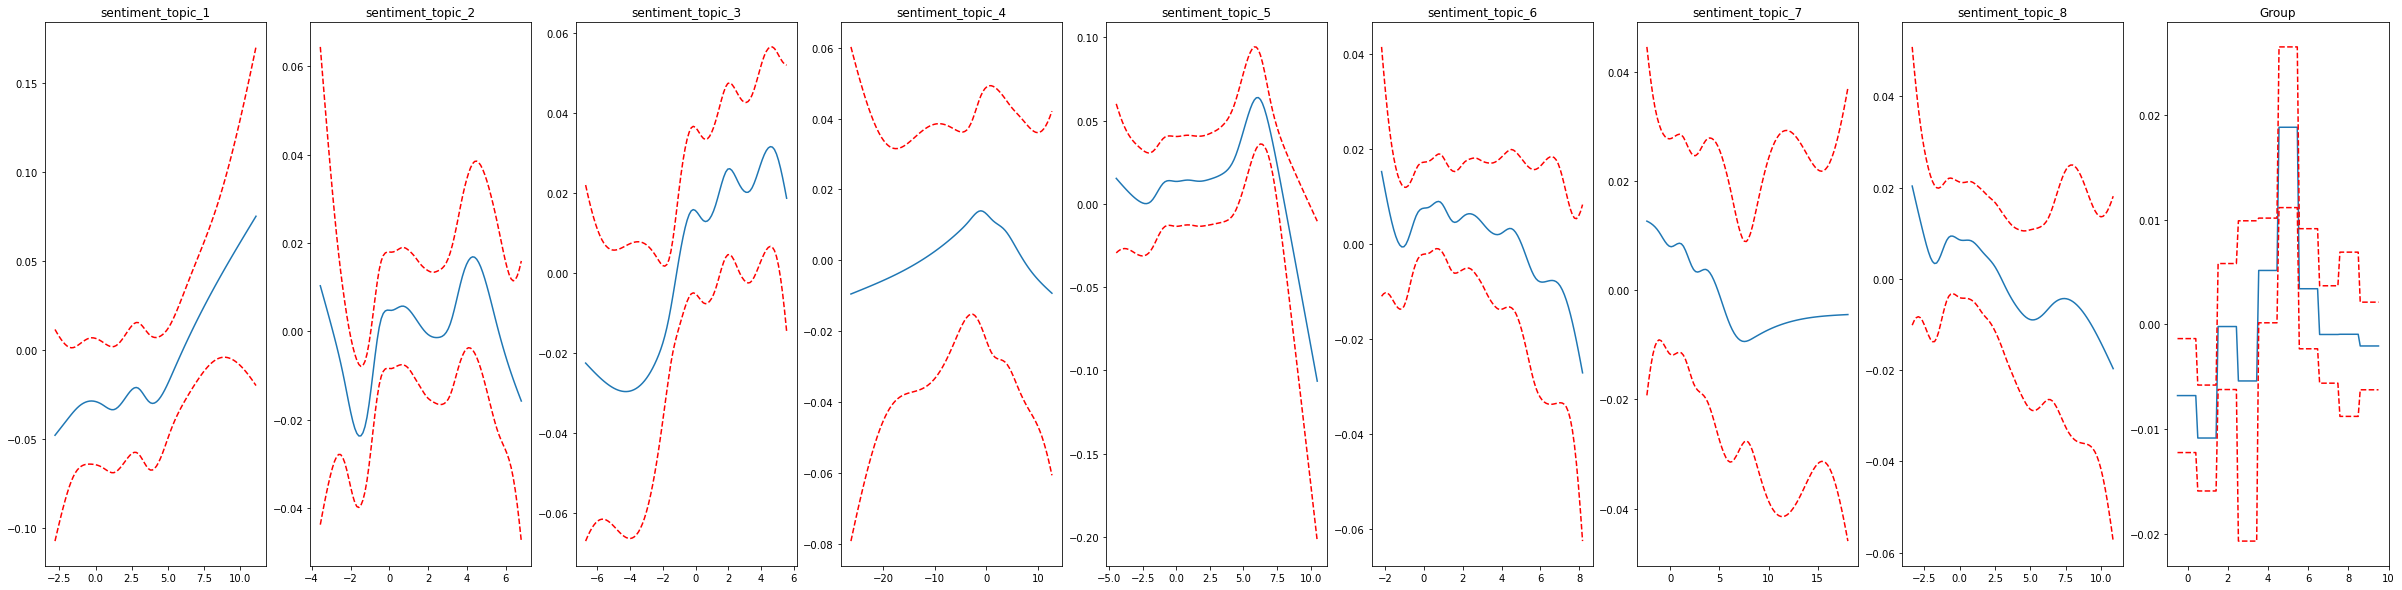

In [108]:
## plotting
plt.figure()
fig, axs = plt.subplots(1,9, figsize=(42,10))

titles = df_QA_same.iloc[:,0:9].columns.to_list()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])

In [33]:
# # # df_QA_interp = pd.read_csv('./regression_df_input/QA_model_df.csv')
# # # apply the same_direction function to the dataframe
# # df_QA_interp_same = same_direction(df_QA, 'D-1')
# # # sort the value 
# # df_MD_interp_same_tp5 = df_QA_interp_same.sort_values(by=['sentiment_topic_5'], ascending=False)
# # df_MD_interp_same_tp5.head(10)

# # df_QA_interp = pd.read_csv('./regression_df_input/QA_model_df.csv')
# # apply the same_direction function to the dataframe
# df_QA_interp_same = same_direction(df_QA, 'D-1')
# # sort the value 
# df_MD_interp_same_tp5 = df_QA_interp_same.sort_values(by=['sentiment_topic_5'], ascending=False)
# df_MD_interp_same_tp5.tail(10)